# Video Games Sales Data
This dataset contains records of popular video games in North America, Japan, Europe and other parts of the world. Every video game in this dataset has at least 100k global sales.

Not sure where to begin? Scroll to the bottom to find challenges!

In [28]:
import pandas as pd
sales = pd.read_csv("vgsales.csv", index_col=0)
print(sales.shape)
sales.head(100)

(16598, 10)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45


## Data Dictionary

| Column        | Explanation                                                                   |
| ------------- | ----------------------------------------------------------------------------- |
| Rank          | Ranking of overall sales                                                      |
| Name          | Name of the game                                                              |
| Platform      | Platform of the games release (i.e. PC,PS4, etc.)                             |
| Year          | Year the game was released in                                                 |
| Genre         | Genre of the game                                                             |
| Publisher     | Publisher of the game                                                         |
| NA_Sales      | Number of sales in North America (in millions)                                |
| EU_Sales      | Number of sales in Europe (in millions)                                       |
| JP_Sales      | Number of sales in Japan (in millions)                                        |
| Other_Sales   | Number of sales in other parts of the world (in millions)                     |
| Global_Sales  | Number of total sales (in millions)                                           |

[Source](https://www.kaggle.com/gregorut/videogamesales) of dataset.

In [29]:
import pandas as pd

df= pd.read_csv('vgsales.csv')

filtered_df = df[df['Platform'].isin(['X360', 'PS3', 'Wii'])]

platform_sales = filtered_df.groupby('Platform')['Global_Sales'].sum().reset_index()

highest_sales_platform = platform_sales.loc[platform_sales['Global_Sales'].idxmax()]

print(f"The console with the highest total global sales is {highest_sales_platform['Platform']} with {highest_sales_platform['Global_Sales']} million units sold.")

The console with the highest total global sales is X360 with 979.96 million units sold.


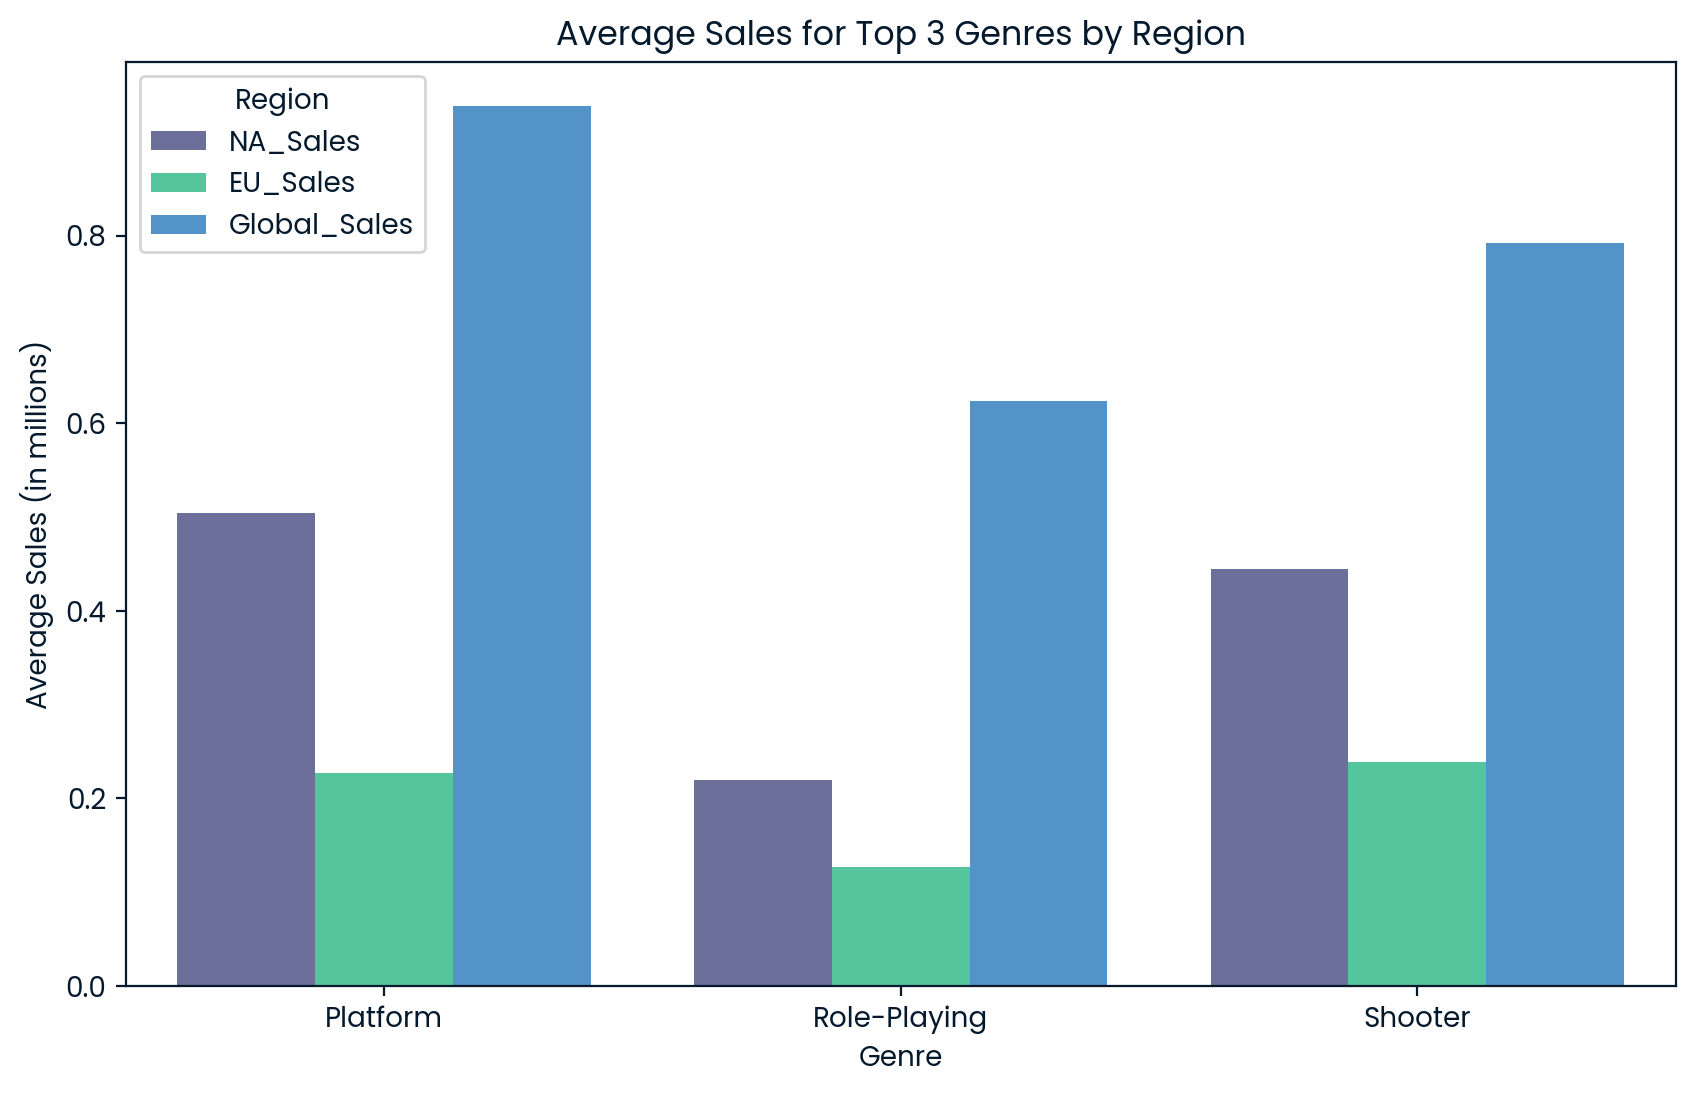

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'Global_Sales']].mean().reset_index()

top_genres = genre_sales.nlargest(3, 'Global_Sales')['Genre']

top_genre_sales = genre_sales[genre_sales['Genre'].isin(top_genres)]

melted_genre_sales = top_genre_sales.melt(id_vars='Genre', value_vars=['NA_Sales', 'EU_Sales', 'Global_Sales'], var_name='Region', value_name='Average_Sales')

plt.figure(figsize=(10, 6))

sns.barplot(data=melted_genre_sales, x='Genre', y='Average_Sales', hue='Region')

plt.title('Average Sales for Top 3 Genres by Region')

plt.xlabel('Genre')

plt.ylabel('Average Sales (in millions)')

plt.legend(title='Region')

plt.show()

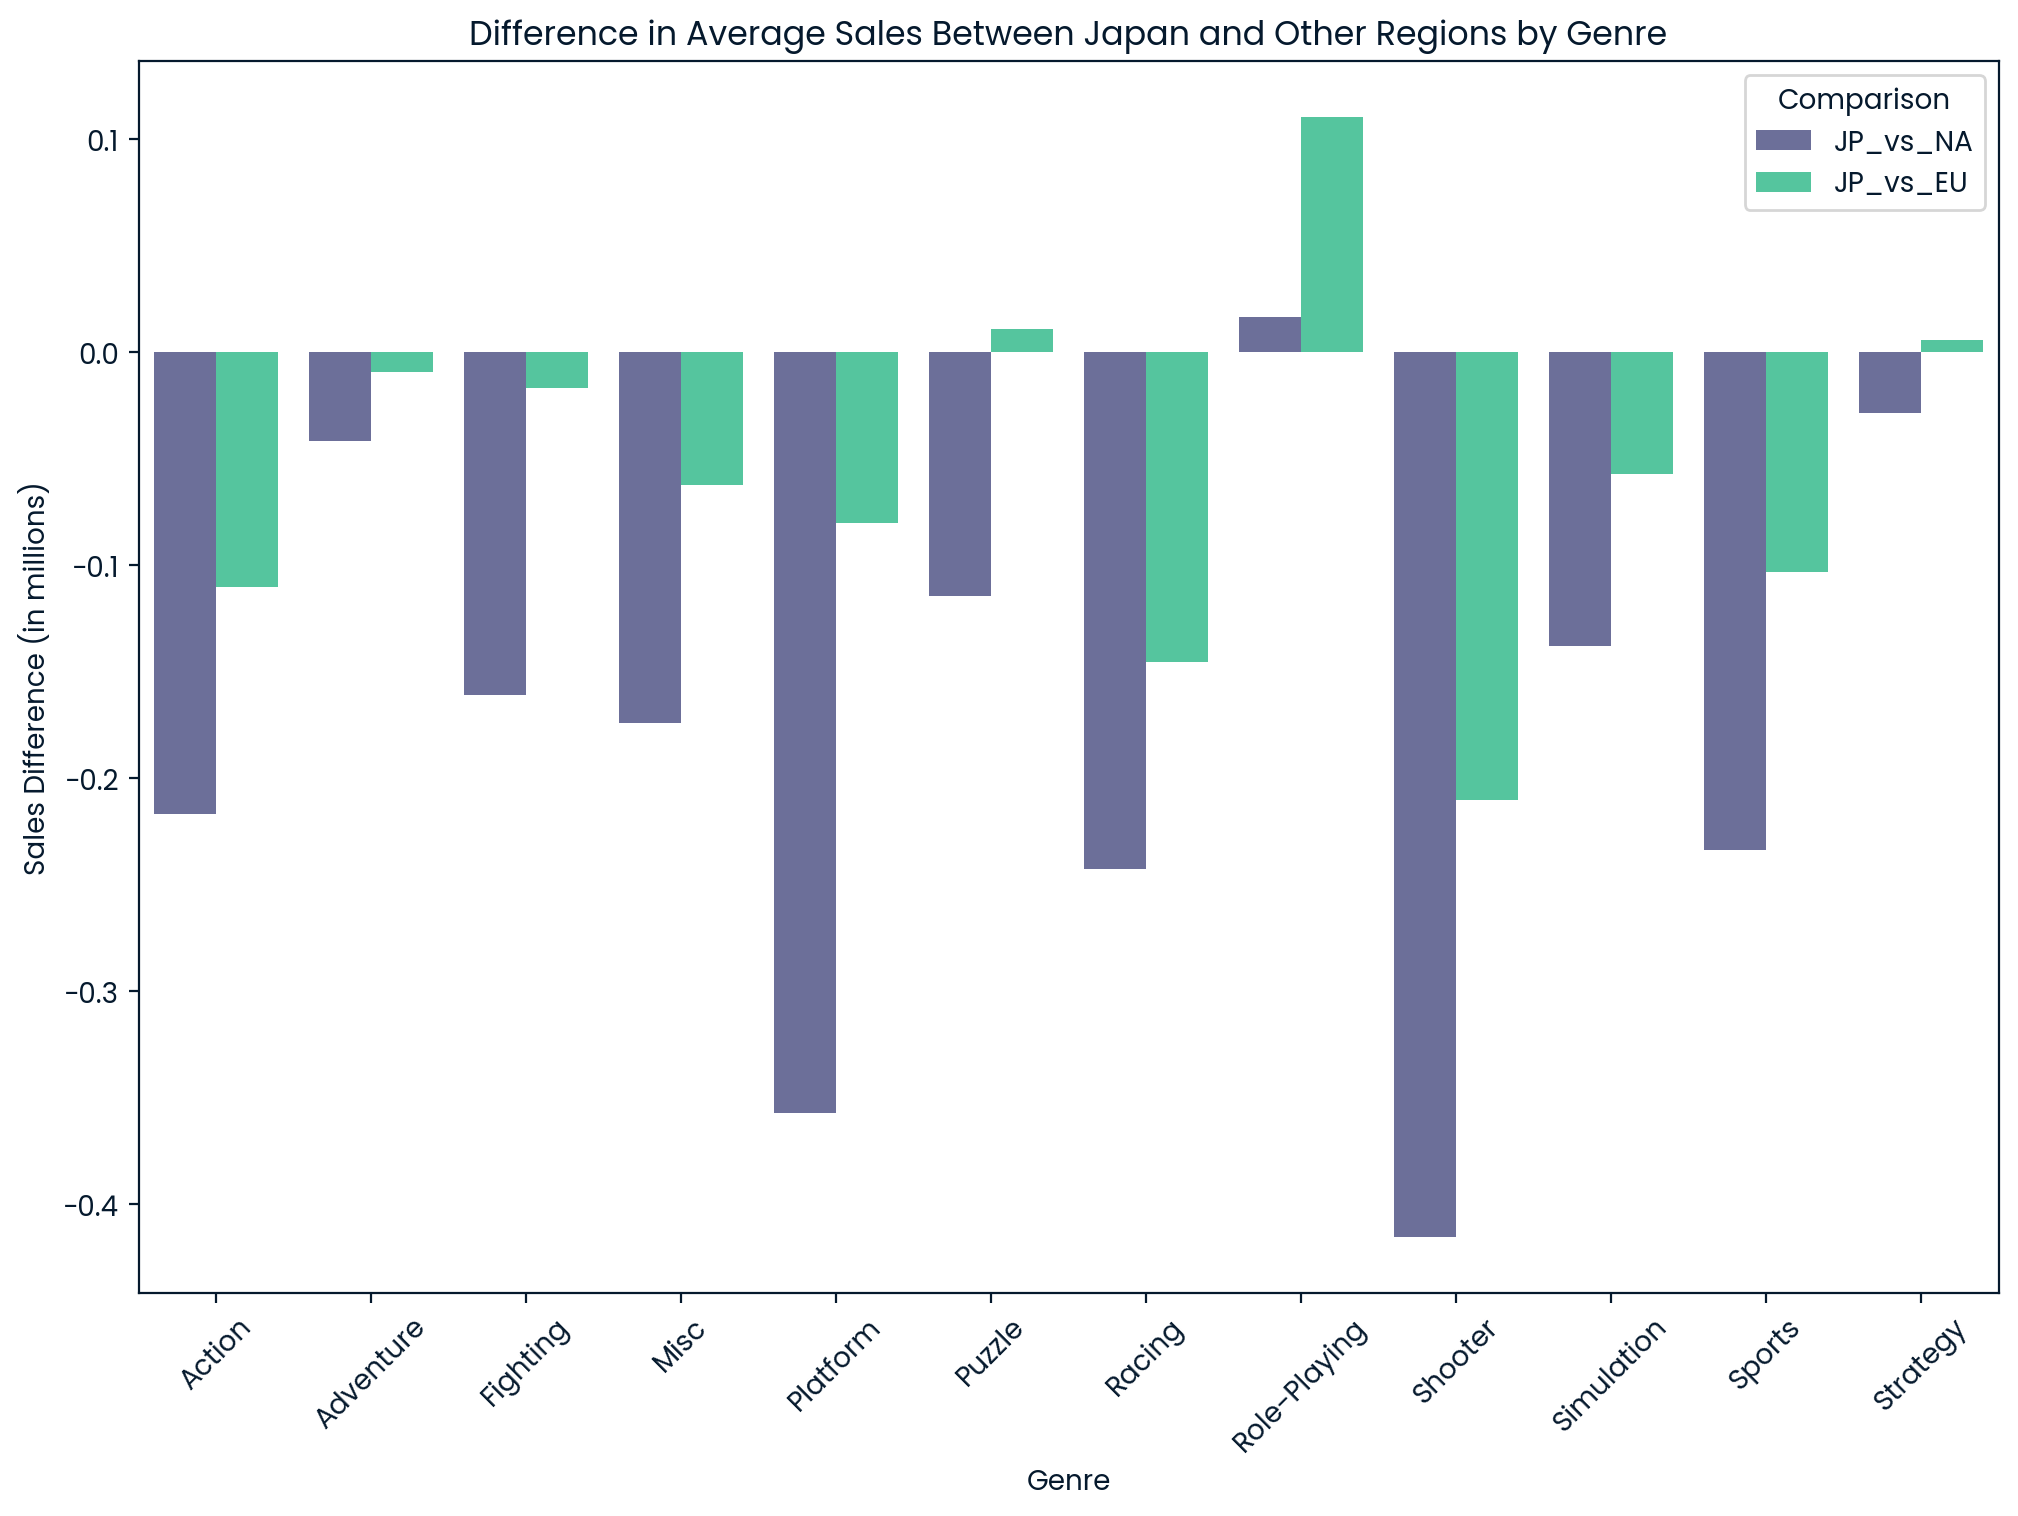

In [31]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# Group by Genre and calculate mean sales for each region

genre_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].mean().reset_index()

# Calculate the difference in sales between Japan and other regions

genre_sales['JP_vs_NA'] = genre_sales['JP_Sales'] - genre_sales['NA_Sales']

genre_sales['JP_vs_EU'] = genre_sales['JP_Sales'] - genre_sales['EU_Sales']

# Melt the dataframe for easier plotting

melted_genre_sales = genre_sales.melt(id_vars='Genre', value_vars=['JP_vs_NA', 'JP_vs_EU'], var_name='Comparison', value_name='Sales_Difference')

# Plot the differences

plt.figure(figsize=(12, 8))

sns.barplot(data=melted_genre_sales, x='Genre', y='Sales_Difference', hue='Comparison')

plt.title('Difference in Average Sales Between Japan and Other Regions by Genre')

plt.xlabel('Genre')

plt.ylabel('Sales Difference (in millions)')

plt.legend(title='Comparison')

plt.xticks(rotation=45)

plt.show()

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which of the three seventh generation consoles (Xbox 360, Playstation 3, and Nintendo Wii) had the highest total sales globally?
- 📊 **Visualize**: Create a plot visualizing the average sales for games in the most popular three genres. Differentiate between NA, EU, and global sales.
- 🔎 **Analyze**: Are some genres significantly more likely to perform better or worse in Japan than others? If so, which ones?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working as a data analyst for a video game retailer based in Japan. The retailer typically orders games based on sales in North America and Europe, as the games are often released later in Japan. However, they have found that North American and European sales are not always a perfect predictor of how a game will sell in Japan.

Your manager has asked you to develop a model that can predict the sales in Japan using sales in North America and Europe and other attributes such as the name of the game, the platform, the genre, and the publisher.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.